Imports

In [63]:
# from Building NRG Solution: https://github.com/fedhere/PUI2017_fb55/blob/master/HW6_fb55/building_nrg_solution.ipynb
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt

try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data Acquisition

### when you have a link to a file that is not in a readable format (For example a .zip file)

In [71]:
# !unzip -d $PUIDATA

### when you are given a link to a file hosted on the web:
df = pd.read_csv('URL')

In [75]:
#!curl -O [URL.csv]
# cmd = "mv rows.csv " + os.getenv("PUIDATA") # store string that moves files to PUIDATA
# print (cmd) # checks that string is formatted correctly
# os.system(cmd) # moves data to PUIDATA

### when you are given a link to an API:

### if all else fail properly refer to the file source!

In [ ]:
# if you can't read it in directly and have to download it to your working directory, explain why!

Exploring Data

## Cleaning

https://github.com/fedhere/PUI2017_fb55/tree/master/HW2_fb55
- Remove all but 2 numerical values columns of your choice (you can use the drop method of the dataframe, like in formatting tables section below.

### drop columns

In [ ]:
df.isnull().any() ## lists out columns and gives Boolean for Nulls in place
df.isnull().sum() ## number of nulls

In [ ]:
df.dropna() ## drop NaN values

### converting the relevant columns to numeric values and throwing away spurious entries

### creating a dictionary with the encoded values

In [ ]:
# if you had a column with values like None, Little, Good, and converting them to numbers

# experience_to_number = {
#     'None' : 0,
#    'Very Little' : 1,
#    'Little' : 2,
#    'Moderate' : 3,    
#    'Good' : 4,
#    'Lots' : 5
# }

In [ ]:
# replacing Computer Experience string with a numerical with map and a dictionary
# placing the new values in a new variable (new column)

# df_student['Experience'] = \
#     df_student['Computer Experience'].map(experience_to_number)

In [ ]:
# it can be done in bulk with a dictionary inline too with map, a dictionary, in place

# df_student['Hair Color'] = df_student['Hair Color'].replace({'Brown':1,'Blonde':0,'Black':2})

### lastly, format height

In [ ]:
# create a function to parse heignt in feet, inch into meters
# use map to apply it


# def formatHeight(heightstring):
#     hs = heightstring.replace('"','').split("'")
#     return float(hs[0]) * 12 + float(hs[1])

# df_student.Height = df_student.Height.map(formatHeight)

# Merging
how the merge files, mostly in pandas

Work with dates in Pandas (pd.to_datetime())

More merging syntax:
https://github.com/fedhere/UInotebooks/blob/master/dataWrangling/PandasDataWrangling-Chap7.ipynb

## Plotting

- Plot the columns one against the other in a scatter plot using the datafraome plot method
- usual rules for plotting apply, see Grading Guidelines and the instruction notebooks for HW1 Extra Credit, part 3, for more detailed hints on how to display your rendered plots: https://github.com/fedhere/PUI2017_fb55/blob/master/HW1_fb55/HW1_3_instructions.ipynb
- and the Lab2 and Class notebooks examples on how to use the dataframe plot modules: https://github.com/fedhere/UInotebooks/tree/master/dataWrangling

In [ ]:
# plot a time series of Social Media activity
# ax = df_sm.plot(x = 'DateSampled', y = 'Likes/Followers/Visits/Downloads', rot=90, 
#                figsize = (10,10), fontsize = 18, 
#                title = "NYC Agencies social media activity 2011-08-08 to 2012-12-12")

#ax.set_ylabel("Number of", fontsize = 18)
#ax.set_xlabel("Date", fontsize = 18)

# Fitting a line - OLS

In [ ]:
statsmodels fit summary

# Error Bars
Comes up if you're scatter plotting and you want to find out how much error your observations have.

You can just assume Poisson Distribution for the error

Error = sqrt of variance (sigma) (stdev of y)

The Scatter Plots with Error Bars procedure extends the capability of the basic scatter plot by allowing you to plot the variability in Y and X corresponding to each point. Each point on the plot represents the mean or median of one or more values for Y and X within a subgroup.
The error bars may represent the standard deviation (SD) of the data, the standard error of the mean (SE), a confidence interval, the data range, or percentiles.

Axes.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)

# NHTS - Null Hypothesis Testing

### must have this!! a statement of Null and alternative, and the significance level chosen

Stating the Null Hypothesis: Ex: The bus rerouting does not change the average travel time.

** $H_0: P_0 - P_1 \geq$    0 **
    
** $H_a: P_0 - P_1 $ < 0    **
    
    
** $\alpha$ = 0.05    **

In [ ]:
# Rejecting the NH: what is the p=value?
# is the probability of drawing a sample at least as extreme as that one you just observed lower than 0.05?
# 1) decide on your significance level (alpha) // typically 0.05
# 2) choose a statistical test (T-test, Z-test, Bayesian Analysis, etc.)
# 3) find the probability 'p' of your measurement for your test Ha *in absense of effect*

### Z Test
### when to use it??: must have mean and stdev from parent population

must define the sample standard deviation

$\sqrt{\frac{p(1 - p)}{n}}$

for 2 samples this becomes

$\sqrt{ \frac{ \hat{p}(1 - \hat{p})} {n1} + \frac{ \hat{p}(1 - \hat{p})} {n1} }$

z score: how many standard deviation away from the population parameter is my statistic?

In [74]:
# print("Z score for [our sample]: {0:.1f}".format(Z))
# print("This means we are {0:.1f} standard deviations away".format(Z))
# print("from the mean of the old trip duration\n\n")
#if z > 2:
#    result = "IS REJECTED"
# else: 
#    result = "CANNOT BE REJECTED"

# print("The Null Hypothesis that the new route makes commuting time worse")
# print("{0:s} at the {1:.1f}% significance level (p<0.05)".format(result, 100*(1-alpha)))

TEST OF PROPORTIONS: we use the Binomial distribution if it is a yes/no (bernulli) test for each subject.

Ex: the former inmate was or was not ever employed in a CEO transitional job

NULL HYPOTHESIS: the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05

$H_0: P_0 - P_1 \geq  0$

$H_a: P_0 - P_1 \lt 0 $

$\alpha$ = 0.05

$P_0=0.035, P_1=0.701$

# Chisq test
for comparing variants
comparing expected values against observation value
DoF is number of observations minus one

def evalChisq HW4

$\chi^2$ test the chisq statistics tests a number against the distribution of the following quantity: $$\chi^2 = \Sigma \frac{(observation - expectation)^2}{expectation}$$ if we talk about sample fractions that is $$\chi^2 = \Sigma \frac{(f_{observed} - f_{expectated})^2}{f_{expected}}$$ turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

The Null hypothesis that the program does not affect CEO employability, 
measured as: the inmates not participating in the program are employed in CEO jobs 
in an equal or higher percentage within 1-3 years of release
can be rejected at alpha = 0.05
with a chi square statistics of 436.22

Since the chisquare statistic of 436.22 is more than the 3.84, the null hypothesis can be rejected at alpha = 0.05.

# Student's t

Is there a difference between the means of two samples?

Must know sigma of the parent population

Used when sample size is small (n < 30)

## Two sample KS Test

NH: the samples come from the same parent distribution

The scipy.stats KS test gives us the significance and the p-value.

NH is rejected if p < 0.05

# Tests for correlation and independence (continuous variables)
The null hypothesis is that the two samples are generated from the same distribution.

The alternative hypothesis is that the two samples are generated by unrelated distributions.

Both work the same, they measure very similar correlation properties, but the Pearson’s is more common, Spearman is supposed to be only for ranks

answer: are the two samples correlated?

### Pearon's

p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

Note that the Pearson's is a pairwise test: the samples need to be a. the same size b. sorted!

Spearman's

This test is often used to assess if sample are generated by the same distribution but in fact it tests if the samples are generated by correlated distributions. As a test to assess independence it is not powerful, as even a small amount of correlation would raise the p-value

# Tests Cheat Sheets
https://github.com/fedhere/UInotebooks/blob/master/slides2017/UI4_PUI2017.pdf

Just know if she asks a question about whether two samples are similar, we use the first, and if she asks if the sample is consistent with some distribution, look to the second

In [ ]:
Chisq goodness of fit

LR is for comparing two models (where overfitting comes in; comparing linear and quadratic. does adding a variable help explain)

# statsmodel WLS
Note: when the number of mass shootings is 0 the error is 0. But 0 errros cannot be used as weight (cause 1/0 = infinity). Thus I am setting the error on the values Nmassshootings = 0 to 1, which is the uncertainty on Nmassshootings = 1.

# Polyfit
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)[source] Least squares polynomial fit.

Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error.

# Weds Morn Midterm Review - follows from HW6

In [13]:
#download, move data to $PUIDATA, and read data in 
!wget https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv
cmd = "mv rows.csv " + os.getenv("PUIDATA")
#the line below is to check that my string is formatted right. I should remove it to make the notebook delivery ready
print (cmd)

--2017-10-25 09:43:11--  https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv
Resolving data.cityofnewyork.us... 52.206.68.26
Connecting to data.cityofnewyork.us|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: “rows.csv”

    [   <=>                                 ] 4,433,512   7.13M/s   in 0.6s    

Last-modified header invalid -- time-stamp ignored.
2017-10-25 09:43:11 (7.13 MB/s) - “rows.csv” saved [4433512]

mv rows.csv /home/cusp/cm4698/PUIdata


In [14]:
os.system(cmd)

0

In [15]:
nrg = pd.read_csv(os.getenv("PUIDATA") + '/rows.csv')
nrg.head()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
nrg.describe()
# gives you a hint about outliers: be aware of NaNs
# if your max is significantly larger than the 75% percentile, you likely have outliers

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Record Number,BBL,Postcode,DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN
count,16170.000000,1.601400e+04,14432.00000,1.446500e+04,14465.000000,11686.000000,11686.000000,11686.000000,11686.000000,11686.000000,1.141800e+04
mean,8085.500000,2.240854e+09,10595.81929,2.022015e+05,1.901348,40.752086,-73.956860,7.009156,16.524388,4907.768698,1.876091e+06
std,4668.021262,1.234669e+09,574.66546,5.360972e+05,5.826292,0.080706,0.049349,4.017144,15.938979,13491.266349,1.022346e+06
min,1.000000,1.000010e+09,10001.00000,5.000800e+04,1.000000,40.516065,-74.243582,1.000000,1.000000,1.000000,1.000000e+06
25%,4043.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8085.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,12127.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,16170.000000,5.079910e+09,11697.00000,2.760000e+07,152.000000,40.912869,-73.715543,56.000000,51.000000,155101.000000,5.166094e+06


In [19]:
# pd.scatter_matrix(nrg) # good for looking at the data but takes time so be careful!
# what's the shape of my file
nrg.shape

(16170, 32)

In [20]:
# take one line out of every 100
nrg[::100].shape

(162, 32)

In [27]:
# another option for looking at a subset
nrg_subsample = nrg.sample(100)
nrg_subsample

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
5438,2575,1.012238e+09,NaN,1-01223-7501,1085084,661,AMSTERDAM AVENUE,Manhattan,10025.0,Filed,...,115297.0,Multifamily Housing,2.0,40.791638,-73.972120,7.0,6.0,177.0,1032532.0,Upper West Side ...
6823,6263,2.032090e+09,NaN,2032090060,2014565,2305,GRAND AVENUE,Bronx,10468.0,Filed,...,59377.0,Multifamily Housing,1.0,40.860138,-73.905038,7.0,14.0,253.0,2014565.0,Kingsbridge Heights ...
7538,7162,2.057160e+09,NaN,2057160500,2083245,2500,JOHNSON AVENUE,Bronx,10463.0,Filed,...,466400.0,Multifamily Housing,1.0,40.877162,-73.917861,8.0,11.0,29302.0,2083245.0,Spuyten Duyvil-Kingsbridge ...
11050,9980,4.005850e+09,NaN,4-00585-0035,4007357,34-20,30 STREET,Queens,11106.0,Filed,...,62640.0,Multifamily Housing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15715,13543,2.044110e+09,NaN,NaN,NaN,1770,STILLWELL AVENUE,Bronx,10469.0,No Submission Matched to BBL,...,54000.0,NaN,1.0,40.858063,-73.834696,11.0,13.0,284.0,2102042.0,Van Nest-Morris Park-Westchester Square ...
5966,2167,1.010760e+09,NaN,1010760043,1806507,520,WEST 48 STREET,Manhattan,10036.0,Filed,...,90107.0,Multifamily Housing,1.0,40.763960,-73.993982,4.0,3.0,129.0,1087113.0,Clinton ...
3786,4371,1.018320e+09,NaN,1-01832-0010,1055256,41,WEST 96 STREET,Manhattan,10025.0,Filed,...,93857.0,Multifamily Housing,1.0,40.792355,-73.966312,7.0,7.0,181.0,1055256.0,Upper West Side ...
11560,10630,4.028050e+09,NaN,4028050010,4062883,74-04,GRAND AVENUE,Queens,11373.0,Filed,...,154337.0,Self-Storage Facility,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10619,8137,3.030780e+09,NaN,3-03078-0001 Multiple,3338422,29,LEONARD STREET,Brooklyn,11206.0,Filed,...,758750.0,Multifamily Housing,2.0,40.704233,-73.946055,1.0,34.0,491.0,3327972.0,East Williamsburg ...
99,15025,1.010560e+09,NaN,1010560001,1081659; 1081660; 1081664; 1081665; 1081666; ...,NaN,NaN,Manhattan,NaN,Not on Covered Buildings List,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
nrg_subsample.shape

(100, 32)

In [29]:
# save your subset to a csv
nrg_subsample.to_csv("mynrgsubsample.csv")

In [30]:
test3 = pd.read_csv("mynrgsubsample.csv")
test3.head()

,Unnamed: 0,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,5438,2575,1.012238e+09,NaN,1-01223-7501,1085084,661,AMSTERDAM AVENUE,Manhattan,10025.0,...,115297.0,Multifamily Housing,2.0,40.791638,-73.972120,7.0,6.0,177.0,1032532.0,Upper West Side ...
1,6823,6263,2.032090e+09,NaN,2032090060,2014565,2305,GRAND AVENUE,Bronx,10468.0,...,59377.0,Multifamily Housing,1.0,40.860138,-73.905038,7.0,14.0,253.0,2014565.0,Kingsbridge Heights ...
2,7538,7162,2.057160e+09,NaN,2057160500,2083245,2500,JOHNSON AVENUE,Bronx,10463.0,...,466400.0,Multifamily Housing,1.0,40.877162,-73.917861,8.0,11.0,29302.0,2083245.0,Spuyten Duyvil-Kingsbridge ...
3,11050,9980,4.005850e+09,NaN,4-00585-0035,4007357,34-20,30 STREET,Queens,11106.0,...,62640.0,Multifamily Housing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15715,13543,2.044110e+09,NaN,NaN,NaN,1770,STILLWELL AVENUE,Bronx,10469.0,...,54000.0,NaN,1.0,40.858063,-73.834696,11.0,13.0,284.0,2102042.0,Van Nest-Morris Park-Westchester Square ...


In [47]:
test3.columns

Index(['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [50]:
# pandas added a new index column, let's get our old one back
# test3.set_index("Unnamed: 0", inplace=True)
test3.head(15)

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
5438,2575,1.012238e+09,NaN,1-01223-7501,1085084,661,AMSTERDAM AVENUE,Manhattan,10025.0,Filed,...,115297.0,Multifamily Housing,2.0,40.791638,-73.972120,7.0,6.0,177.0,1032532.0,Upper West Side ...
6823,6263,2.032090e+09,NaN,2032090060,2014565,2305,GRAND AVENUE,Bronx,10468.0,Filed,...,59377.0,Multifamily Housing,1.0,40.860138,-73.905038,7.0,14.0,253.0,2014565.0,Kingsbridge Heights ...
7538,7162,2.057160e+09,NaN,2057160500,2083245,2500,JOHNSON AVENUE,Bronx,10463.0,Filed,...,466400.0,Multifamily Housing,1.0,40.877162,-73.917861,8.0,11.0,29302.0,2083245.0,Spuyten Duyvil-Kingsbridge ...
11050,9980,4.005850e+09,NaN,4-00585-0035,4007357,34-20,30 STREET,Queens,11106.0,Filed,...,62640.0,Multifamily Housing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15715,13543,2.044110e+09,NaN,NaN,NaN,1770,STILLWELL AVENUE,Bronx,10469.0,No Submission Matched to BBL,...,54000.0,NaN,1.0,40.858063,-73.834696,11.0,13.0,284.0,2102042.0,Van Nest-Morris Park-Westchester Square ...
5966,2167,1.010760e+09,NaN,1010760043,1806507,520,WEST 48 STREET,Manhattan,10036.0,Filed,...,90107.0,Multifamily Housing,1.0,40.763960,-73.993982,4.0,3.0,129.0,1087113.0,Clinton ...
3786,4371,1.018320e+09,NaN,1-01832-0010,1055256,41,WEST 96 STREET,Manhattan,10025.0,Filed,...,93857.0,Multifamily Housing,1.0,40.792355,-73.966312,7.0,7.0,181.0,1055256.0,Upper West Side ...
11560,10630,4.028050e+09,NaN,4028050010,4062883,74-04,GRAND AVENUE,Queens,11373.0,Filed,...,154337.0,Self-Storage Facility,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10619,8137,3.030780e+09,NaN,3-03078-0001 Multiple,3338422,29,LEONARD STREET,Brooklyn,11206.0,Filed,...,758750.0,Multifamily Housing,2.0,40.704233,-73.946055,1.0,34.0,491.0,3327972.0,East Williamsburg ...


In [36]:
test3['Record Number'].values

array([ 2575,  6263,  7162,  9980, 13543,  2167,  4371, 10630,  8137,
       15025, 13644,  5219, 13565,  1777,  1647,  5055,  5688,  6439,
       14006,  2776, 13547,   619,  2935,  2852,  8589, 11161,  6228,
        6148,  5183, 12997, 13387,  2618,  5495, 10942,  7253,  8172,
       13380, 13202,  4356,  3258, 15791, 13601, 14572, 11785,  2627,
        9249,  6321,  6545,  7411,  7995,   993,  2090,  6952,  1596,
       13414,  8684,  9586, 14722,  8128, 12325, 10581,  1065, 10785,
       14068,  1567, 11572,  1008, 14327,  9575, 10577,  9262, 10928,
        7960, 12209, 13063,  6340,  3662, 12168, 10208, 13186,  1517,
        8150,  5299,  3210,  6878, 14885, 12790, 11643,  7525,  3603,
        3462,  7121, 13094,  9499, 14094, 13263, 14330,  1983, 12725, 10126])

In [46]:
# use loc and iloc to extract a particular observation
test3.iloc[0]["BBL"] , test3.loc[7538]["BBL"]

(1012237501.0, 2057160500.0)

In [53]:
# drop NaN from zipcodes if we want to groupby them
test3.dropna(subset = ['Postcode'], inplace=True) # axis 0 if you want to drop the rows that have NaN for any variable
# inplace=True will overwrite the df
# subset is which variable you want to drop
test3.head(15)

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
5438,2575,1.012238e+09,NaN,1-01223-7501,1085084,661,AMSTERDAM AVENUE,Manhattan,10025.0,Filed,...,115297.0,Multifamily Housing,2.0,40.791638,-73.972120,7.0,6.0,177.0,1032532.0,Upper West Side ...
6823,6263,2.032090e+09,NaN,2032090060,2014565,2305,GRAND AVENUE,Bronx,10468.0,Filed,...,59377.0,Multifamily Housing,1.0,40.860138,-73.905038,7.0,14.0,253.0,2014565.0,Kingsbridge Heights ...
7538,7162,2.057160e+09,NaN,2057160500,2083245,2500,JOHNSON AVENUE,Bronx,10463.0,Filed,...,466400.0,Multifamily Housing,1.0,40.877162,-73.917861,8.0,11.0,29302.0,2083245.0,Spuyten Duyvil-Kingsbridge ...
11050,9980,4.005850e+09,NaN,4-00585-0035,4007357,34-20,30 STREET,Queens,11106.0,Filed,...,62640.0,Multifamily Housing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15715,13543,2.044110e+09,NaN,NaN,NaN,1770,STILLWELL AVENUE,Bronx,10469.0,No Submission Matched to BBL,...,54000.0,NaN,1.0,40.858063,-73.834696,11.0,13.0,284.0,2102042.0,Van Nest-Morris Park-Westchester Square ...
5966,2167,1.010760e+09,NaN,1010760043,1806507,520,WEST 48 STREET,Manhattan,10036.0,Filed,...,90107.0,Multifamily Housing,1.0,40.763960,-73.993982,4.0,3.0,129.0,1087113.0,Clinton ...
3786,4371,1.018320e+09,NaN,1-01832-0010,1055256,41,WEST 96 STREET,Manhattan,10025.0,Filed,...,93857.0,Multifamily Housing,1.0,40.792355,-73.966312,7.0,7.0,181.0,1055256.0,Upper West Side ...
11560,10630,4.028050e+09,NaN,4028050010,4062883,74-04,GRAND AVENUE,Queens,11373.0,Filed,...,154337.0,Self-Storage Facility,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10619,8137,3.030780e+09,NaN,3-03078-0001 Multiple,3338422,29,LEONARD STREET,Brooklyn,11206.0,Filed,...,758750.0,Multifamily Housing,2.0,40.704233,-73.946055,1.0,34.0,491.0,3327972.0,East Williamsburg ...


In [54]:
test3['Postcode'] = test3.Postcode.astype(int)

In [60]:
# now let's groupby!
# by tells you how you group, aka what you're grouping
# we're going to pass it a Series, Borough
test3.groupby(by="Borough") # have to add .mean, for example, otherwise it doesn't know how to combine the values in that column
# test3.groupby(by="Postcode").median()


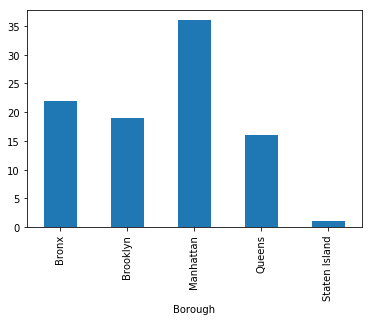

In [64]:
test3.groupby(by = 'Borough').count()['BBL'].plot(kind='bar')

In [65]:
test3.columns

Index(['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [69]:
smf.ols(formula = 'BBL ~ Postcode + Longitude', data = test3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     157.6
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           1.40e-27
Time:                        10:53:58   Log-Likelihood:                -1654.5
No. Observations:                  78   AIC:                             3315.
Df Residuals:                      75   BIC:                             3322.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.695e+11   6.83e+10     -2.482      0.015     -3.06e+11 -3.34e+10
Postcode    1.702e+06   9.59e+04     17.745      0.000      1.51e+06  1.89e+06
Longitude  -2.076e+09   9.22e+08     -2.252      0.027     -3.91e+09  -2.4e+08
==============================================================================
Omnibus:                      126.544   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4886.164
Skew:                           5.410   Prob(JB):                         0.00
Kurtosis:                      40.234   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
smf.ols(formula = 'BBL ~ Postcode + Longitude + I(Postcode**2)', data = test3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     352.3
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           1.02e-43
Time:                        10:54:19   Log-Likelihood:                -1612.5
No. Observations:                  78   AIC:                             3233.
Df Residuals:                      74   BIC:                             3242.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept        -9.219e+11   7.45e+10    -12.368      0.000     -1.07e+12 -7.73e+11
Postcode          6.255e+07   5.08e+06     12.311      0.000      5.24e+07  7.27e+07
Longitude         -7.89e+09   7.27e+08    -10.849      0.000     -9.34e+09 -6.44e+09
I(Postcode ** 2) -2862.6553    239.028    -11.976      0.000     -3338.928 -2386.382
==============================================================================
Omnibus:                       54.152   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.967
Skew:                           2.007   Prob(JB):                     7.30e-66
Kurtosis:                      11.728   Cond. No.                     3.06e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""